In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


dataset_path = "/content/drive/MyDrive/Disaster_Data"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_ds = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',   # one-hot labels
    subset='training'
)

val_ds = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',   # one-hot labels
    subset='validation'
)

Found 2101 images belonging to 3 classes.
Found 524 images belonging to 3 classes.


In [5]:
# ===============================
# 2. CNN Model
# ===============================
model = models.Sequential([
    tf.keras.Input(shape=(128, 128, 3)), # Use Input layer as the first layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')   # 3 classes
])

In [6]:

# ===============================
# 3. Compile
# ===============================
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',   # ✅ matches one-hot labels
    metrics=['accuracy']
)

In [7]:
# ===============================
# 4. Train
# ===============================
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 766s 12s/step - accuracy: 0.5032 - loss: 1.0179 - val_accuracy: 0.6183 - val_loss: 0.7936
Epoch 2/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.6638 - loss: 0.7312 - val_accuracy: 0.7176 - val_loss: 0.7392
Epoch 3/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.7114 - loss: 0.6320 - val_accuracy: 0.6966 - val_loss: 0.7580
Epoch 4/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.7278 - loss: 0.6072 - val_accuracy: 0.7252 - val_loss: 0.7167
Epoch 5/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.7449 - loss: 0.5708 - val_accuracy: 0.7290 - val_loss: 0.7135


In [8]:

# ===============================
# 5. Evaluate
# ===============================
loss, acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {acc:.2f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 551ms/step - accuracy: 0.6935 - loss: 0.7546
Validation Accuracy: 0.73


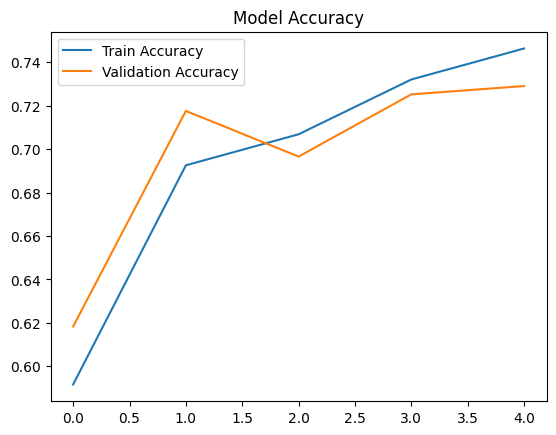

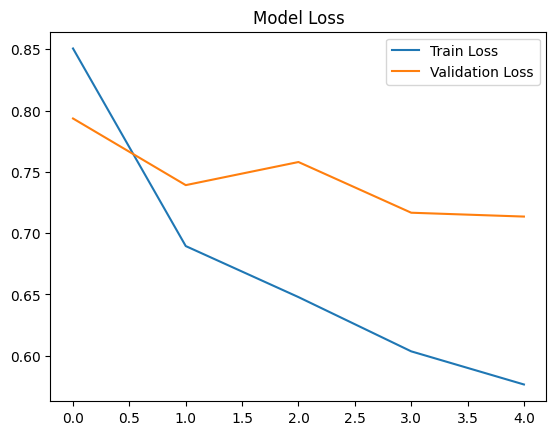

In [9]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


Class Labels: ['Fire_Disaster', 'Land_Disaster', 'Water_Disaster']
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


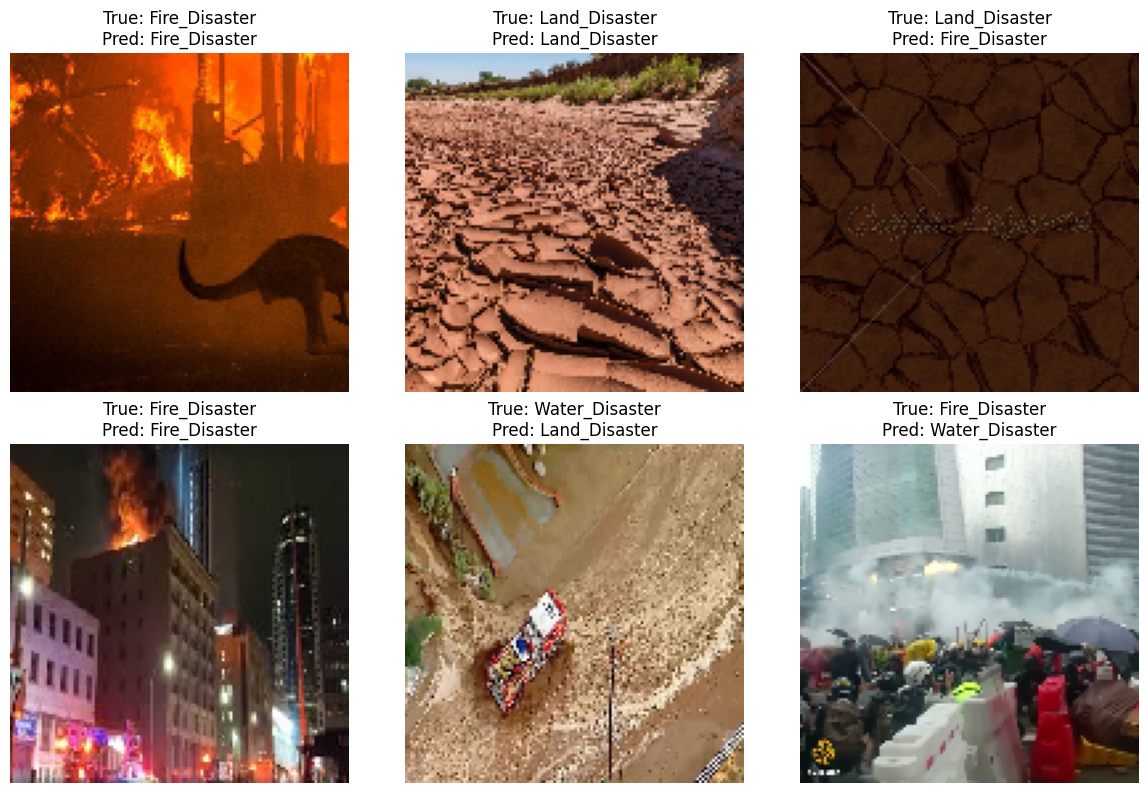

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get class labels
class_labels = list(train_ds.class_indices.keys())
print("Class Labels:", class_labels)

# Take 1 batch of validation images
images, labels = next(val_ds)

# Predict
preds = model.predict(images)
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(labels, axis=1)

# Show 6 images with true vs predicted
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(f"True: {class_labels[true_classes[i]]}\nPred: {class_labels[pred_classes[i]]}")

plt.tight_layout()
plt.show()
